In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

In [245]:
data = 'C:/Users/CLINTON/Documents/My documents/LLM/Informatics/INFX 598/datasets/Credit card Fraud detection/telecom_customer_churn.csv'
data = pd.read_csv(data)
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [246]:
data.shape

(7043, 38)

In [247]:
#Checking of Missing Data
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [248]:
#Checking for Duplicates
data.duplicated().sum()

0

In [249]:
data['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [250]:
#Created an extra column and Assigned it Churn and Not Churn
def churn_value(value):
    if value == 'Churned':
        return 1
    else:
        return 0
   
 
data['churn_value'] = data['Customer Status'].map(churn_value)
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,churn_value
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,0
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1


In [251]:
#features with negligible correlatiom
Correlation_Matrix = data.corr()
non_correlated = Correlation_Matrix.index[abs(Correlation_Matrix["churn_value"])<0.1]
non_correlated

Index(['Zip Code', 'Latitude', 'Longitude',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Total Refunds', 'Total Extra Data Charges'],
      dtype='object')

In [188]:
#Dropping features with Negligible correlation
data.drop(['Zip Code', 'Latitude', 'Longitude',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Total Refunds', 'Total Extra Data Charges'], axis =1, inplace = True)

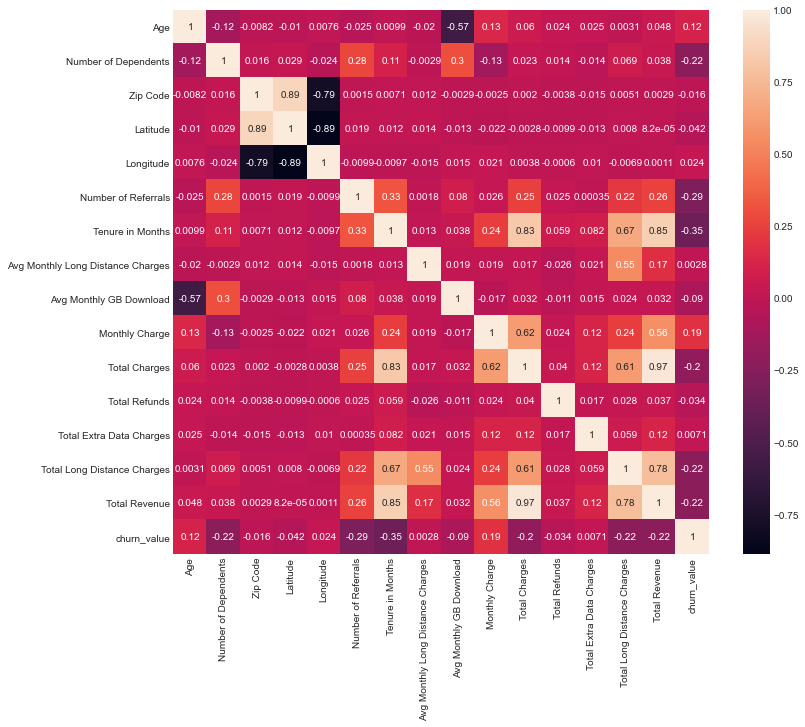

In [252]:
#Correlation
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data.corr(), annot = True)


In [189]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,churn_value
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,...,Yes,Credit Card,65.6,593.30,381.51,974.81,Stayed,NaN,NaN,0
1,0003-MKNFE,Male,46,No,0,Glendale,0,9,None,Yes,...,No,Credit Card,-4.0,542.40,96.21,610.28,Stayed,NaN,NaN,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,...,Yes,Bank Withdrawal,73.9,280.85,134.60,415.45,Churned,Competitor,Competitor had better devices,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,...,Yes,Bank Withdrawal,98.0,1237.85,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,...,Yes,Credit Card,83.9,267.40,22.14,289.54,Churned,Dissatisfaction,Network reliability,1


In [190]:
#Creating a funtion for Missing Values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table


In [191]:
missing_zero_values_table(data)

Your selected dataframe has 32 columns and 7043 Rows.
There are 12 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Churn Category,0,5174,73.5,5174,73.5,object
Churn Reason,0,5174,73.5,5174,73.5,object
Internet Type,0,1526,21.7,1526,21.7,object
Online Security,0,1526,21.7,1526,21.7,object
Online Backup,0,1526,21.7,1526,21.7,object
Device Protection Plan,0,1526,21.7,1526,21.7,object
Premium Tech Support,0,1526,21.7,1526,21.7,object
Streaming TV,0,1526,21.7,1526,21.7,object
Streaming Movies,0,1526,21.7,1526,21.7,object
Streaming Music,0,1526,21.7,1526,21.7,object


In [192]:
churn_data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,churn_value
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,...,Yes,Bank Withdrawal,73.9,280.85,134.60,415.45,Churned,Competitor,Competitor had better devices,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,...,Yes,Bank Withdrawal,98.0,1237.85,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,...,Yes,Credit Card,83.9,267.40,22.14,289.54,Churned,Dissatisfaction,Network reliability,1
18,0022-TCJCI,Male,79,No,0,Daly City,0,45,None,Yes,...,No,Credit Card,62.7,2791.50,480.15,3271.65,Churned,Dissatisfaction,Limited range of services,1
19,0023-HGHWL,Male,67,No,0,Morgan Hill,0,1,None,No,...,Yes,Bank Withdrawal,25.1,25.10,0.00,25.10,Churned,Competitor,Competitor made better offer,1


### Data Exploration

In [193]:
#Top 10 reasons customers churn 
churn_data = data[data['churn_value']==1]
churn_reason = churn_data.groupby('Churn Reason')['churn_value'].count().reset_index().sort_values(by= 'churn_value', ascending = False)
Top_10_reasons = churn_reason.head(10)
Top_10_reasons

,Churn Reason,churn_value
2,Competitor had better devices,313
3,Competitor made better offer,311
1,Attitude of support person,220
7,Don't know,130
5,Competitor offered more data,117
4,Competitor offered higher download speeds,100
0,Attitude of service provider,94
17,Price too high,78
18,Product dissatisfaction,77
14,Network reliability,72


Text(0.5, 1.0, 'Top 10 Reasons for Churn')

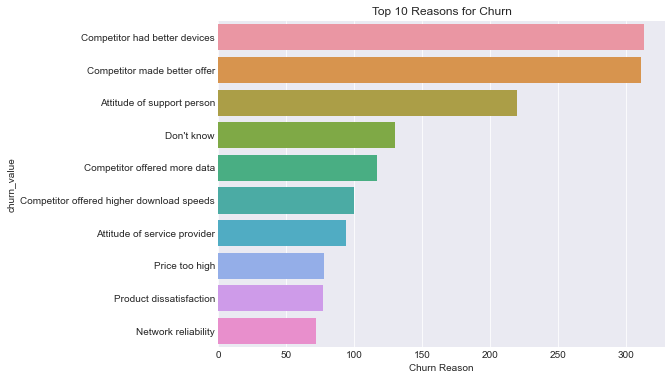

In [233]:
plt.figure(figsize=(8,6))
sns.barplot(y = Top_10_reasons['Churn Reason'], x = Top_10_reasons['churn_value'], orient = 'h')

plt.xlabel('Churn Reason')
plt.ylabel("churn_value")
plt.title("Top 10 Reasons for Churn")

In [231]:
#Contract and Churn
contract_churn = churn_data.groupby('Contract')['churn_value'].count().reset_index().sort_values(by= 'churn_value', ascending = False)
contract_churn

,Contract,churn_value
0,Month-to-Month,1655
1,One Year,166
2,Two Year,48


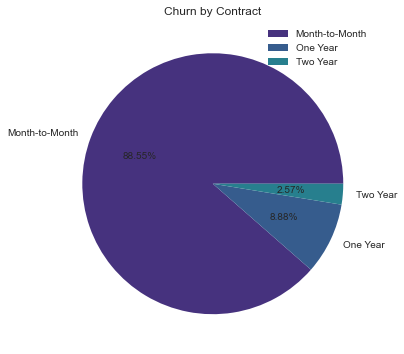

In [239]:
plt.figure(figsize=(8,6))
plt.pie(contract_churn['churn_value'], labels = contract_churn['Contract'],autopct='%1.2f%%')
plt.legend()
plt.title("Churn by Contract")
plt.show()

In [195]:
#Pay methods and their Churn
pay_method = churn_data.groupby('Payment Method')['churn_value'].count().reset_index().sort_values(by= 'churn_value', ascending = False)
Top_10_methods = pay_method.head(10)
Top_10_methods

,Payment Method,churn_value
0,Bank Withdrawal,1329
1,Credit Card,398
2,Mailed Check,142


Text(0.5, 1.0, 'Top 10 Payment Method with Churn')

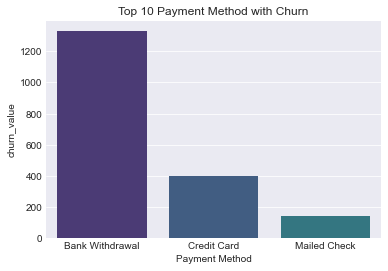

In [234]:
sns.barplot(x = Top_10_methods['Payment Method'], y = Top_10_methods['churn_value'])

plt.xlabel('Payment Method')
plt.ylabel("churn_value")
plt.title("Top 10 Payment Method with Churn")

In [197]:
#Churn By Offer
offer_churn = churn_data.groupby('Offer')['churn_value'].count().reset_index().sort_values(by= 'churn_value', ascending = False)
offer_churn

,Offer,churn_value
0,None,1051
5,Offer E,426
4,Offer D,161
2,Offer B,101
3,Offer C,95
1,Offer A,35


Text(0.5, 1.0, 'TChurn by Offer')

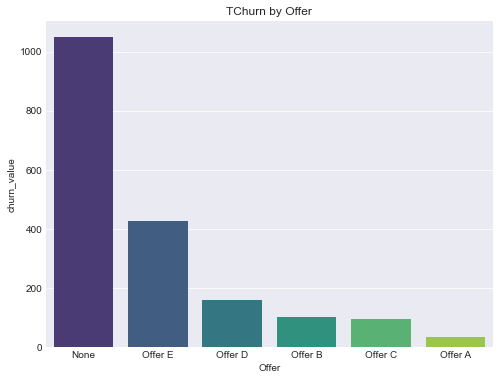

In [235]:
plt.figure(figsize=(8,6))
sns.barplot(x = offer_churn['Offer'], y = offer_churn['churn_value'])

plt.xlabel('Offer')
plt.ylabel("churn_value")
plt.title("TChurn by Offer")

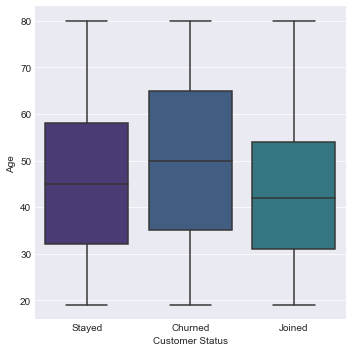

In [241]:
#Churn by Age
sns.catplot(data=data, x="Customer Status", y="Age", kind="box")

In [200]:
# Dropping columns with more than 20% missing values 
missing_data = data.isnull().sum()/len(data)
data = data.drop(columns=missing_data[missing_data>0.2].index)
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status,churn_value
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,2,9,None,Yes,...,Yes,One Year,Yes,Credit Card,65.6,593.30,381.51,974.81,Stayed,0
1,0003-MKNFE,Male,46,No,0,Glendale,0,9,None,Yes,...,Yes,Month-to-Month,No,Credit Card,-4.0,542.40,96.21,610.28,Stayed,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,134.60,415.45,Churned,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,361.66,1599.51,Churned,1
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,3,3,None,Yes,...,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,22.14,289.54,Churned,1


In [201]:
data.drop(['Customer ID','Customer Status'], axis =1, inplace = True)

In [202]:
data.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,churn_value
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,No,Yes,One Year,Yes,Credit Card,65.6,593.30,381.51,974.81,0
1,Male,46,No,0,Glendale,0,9,None,Yes,Yes,Yes,Month-to-Month,No,Credit Card,-4.0,542.40,96.21,610.28,0
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,134.60,415.45,1
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,361.66,1599.51,1
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,22.14,289.54,1


In [203]:
data = data.dropna()

### Data Preprocessing

In [204]:
Y = data["churn_value"]
features = data.drop(columns='churn_value')

In [205]:
numerical_features = features._get_numeric_data().columns 
categorical_features = features.columns.difference(numerical_features)

In [206]:
numerical_features = data[numerical_features]

In [207]:
numerical_features

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,37,0,2,9,65.60,593.30,381.51,974.81
1,46,0,0,9,-4.00,542.40,96.21,610.28
2,50,0,0,4,73.90,280.85,134.60,415.45
3,78,0,1,13,98.00,1237.85,361.66,1599.51
4,75,0,3,3,83.90,267.40,22.14,289.54
...,...,...,...,...,...,...,...,...
7037,36,0,0,4,20.95,85.50,8.04,93.54
7038,20,0,0,13,55.15,742.90,606.84,1349.74
7039,40,0,1,22,85.10,1873.70,356.40,2230.10
7040,22,0,0,2,50.30,92.75,37.24,129.99


In [208]:
categorical_features = data[categorical_features]
categorical_features

,City,Contract,Gender,Internet Service,Married,Multiple Lines,Offer,Paperless Billing,Payment Method,Phone Service
0,Frazier Park,One Year,Female,Yes,Yes,No,None,Yes,Credit Card,Yes
1,Glendale,Month-to-Month,Male,Yes,No,Yes,None,No,Credit Card,Yes
2,Costa Mesa,Month-to-Month,Male,Yes,No,No,Offer E,Yes,Bank Withdrawal,Yes
3,Martinez,Month-to-Month,Male,Yes,Yes,No,Offer D,Yes,Bank Withdrawal,Yes
4,Camarillo,Month-to-Month,Female,Yes,Yes,No,None,Yes,Credit Card,Yes
...,...,...,...,...,...,...,...,...,...,...
7037,Fallbrook,Month-to-Month,Female,No,No,No,None,No,Bank Withdrawal,Yes
7038,La Mesa,One Year,Female,Yes,No,No,Offer D,No,Credit Card,Yes
7039,Riverbank,Month-to-Month,Male,Yes,Yes,Yes,Offer D,Yes,Bank Withdrawal,Yes
7040,Elk,Month-to-Month,Male,Yes,No,No,Offer E,Yes,Credit Card,Yes


In [209]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# Warnings
import warnings
warnings.filterwarnings('ignore')


In [210]:
#Scaling the  numeric features Data
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
    
for col in numerical_features.columns:
    numerical_features[col] = ss.fit_transform(numerical_features[[col]]).squeeze()

In [211]:
#Enconding the CategoricalFeatures
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = categorical_features.astype(str).apply(LabelEncoder().fit_transform)

In [212]:
train_data = pd.concat([numerical_features, categorical_features], axis = 1)
train_data = pd.concat([train_data, Y], axis = 1)

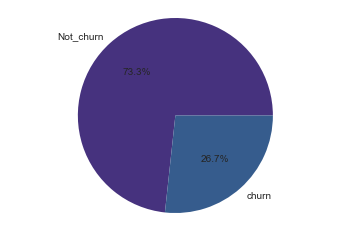

In [237]:
# Class imbalance check
plt.pie(train_data.churn_value.value_counts(), labels=['Not_churn', 'churn'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [214]:
Y = train_data["churn_value"]
X = train_data.drop(columns='churn_value')

In [215]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [216]:
# Applying SMOTE to deal with the class imbalance by oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
pd.value_counts(Y_train_smote)

1    3255
0    3255
Name: churn_value, dtype: int64

### Data Modelling

##### Logistics Regression

In [217]:

from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear', random_state = 1).fit(X_train_smote, Y_train_smote)

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(Y_true, Y_pred, label):
    return pd.Series({'accuracy':accuracy_score(Y_true, Y_pred),
                      'precision': precision_score(Y_true, Y_pred),
                      'recall': recall_score(Y_true, Y_pred),
                      'f1': f1_score(Y_true, Y_pred)},
                      name=label)

In [219]:
# The error on the training and test data sets
Y_train_pred = lr.predict(X_train_smote)
Y_test_pred = lr.predict(X_test)

train_test_full_error = pd.concat([measure_error(Y_train_smote, Y_train_pred, 'train'),
                              measure_error(Y_test, Y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,0.835637,0.772656
precision,0.803220,0.545822
recall,0.889094,0.806773
f1,0.843978,0.651125


Text(0.5, 33.0, 'Ground Truth')

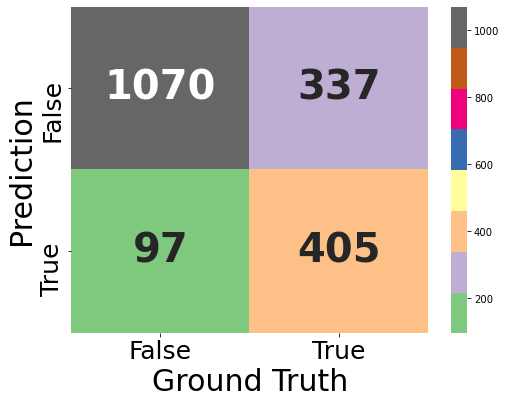

In [220]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

##### Decision Tree Classifier

In [221]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train_smote, Y_train_smote)

In [222]:
# The error on the training and test data sets
Y_train_pred = dt.predict(X_train_smote)
Y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(Y_train_smote, Y_train_pred, 'train'),
                              measure_error(Y_test, Y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,1.0,0.777894
precision,1.0,0.566102
recall,1.0,0.665339
f1,1.0,0.611722


Text(0.5, 33.0, 'Ground Truth')

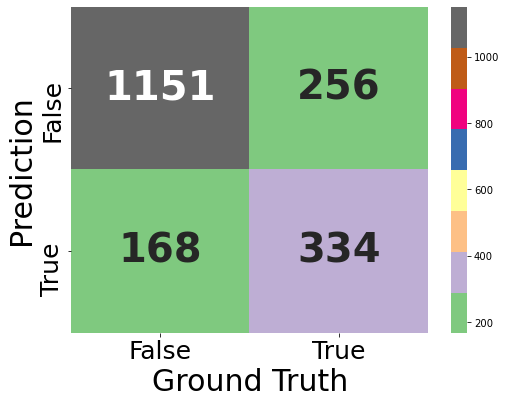

In [223]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

##### RandomForest Classifier

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=1)
rf = rf.fit(X_train_smote, Y_train_smote)

In [226]:
# The error on the training and test data sets
Y_train_pred = rf.predict(X_train_smote)
Y_test_pred = rf.predict(X_test)

train_test_full_error = pd.concat([measure_error(Y_train_smote, Y_train_pred, 'train'),
                              measure_error(Y_test, Y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,1.0,0.821896
precision,1.0,0.640138
recall,1.0,0.737052
f1,1.0,0.685185


Text(0.5, 33.0, 'Ground Truth')

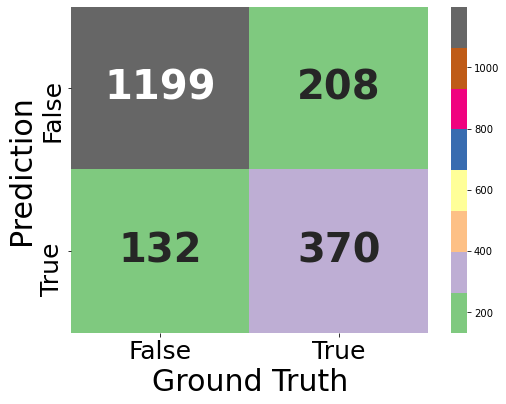

In [227]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [43]:
#Applying Gridsearch Cross Validation
# The parameters to be fit
from sklearn.model_selection import GridSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
# The grid search object
GV_GBC = GridSearchCV(RandomForestClassifier(random_state=1), 
                      param_grid= hyperparameter_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train_smote, Y_train_smote)

In [44]:
GV_GBC.best_estimator_

RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=500, random_state=1)

In [45]:
Y_train_pred_GV_GBC = GV_GBC.predict(X_train_smote)
Y_test_pred_GV_GBC =GV_GBC.predict(X_test)
train_test_full_error = pd.concat([measure_error(Y_train_smote,Y_train_pred_GV_GBC, 'train'),
                              measure_error(Y_test, Y_test_pred_GV_GBC, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.820849
precision,1.0,0.636054
recall,1.0,0.745020
f1,1.0,0.686239


Text(0.5, 87.0, 'Ground Truth')

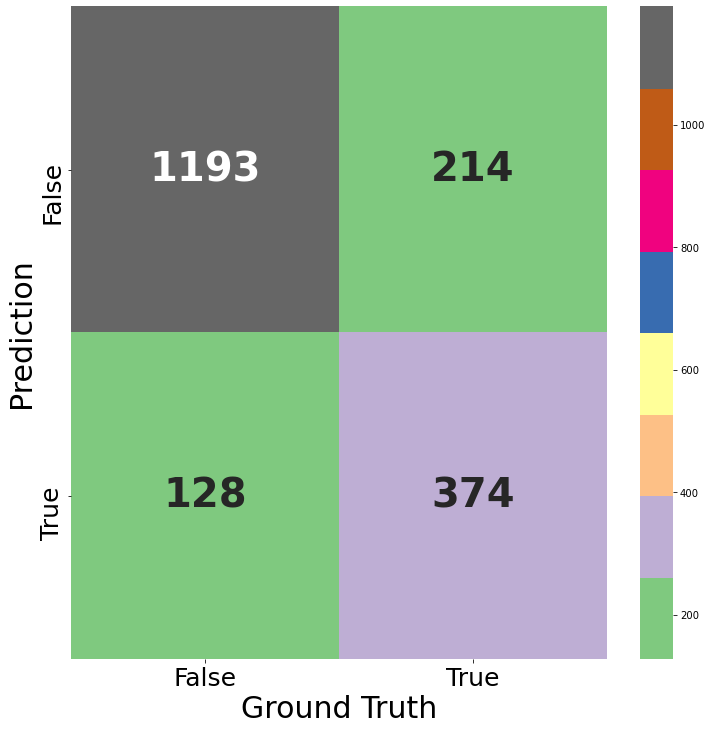

In [46]:
sns.color_palette("viridis")
sns.set_palette(sns.color_palette("viridis"))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(Y_test, Y_test_pred_GV_GBC), annot=True, fmt='d', cmap= 'Accent', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

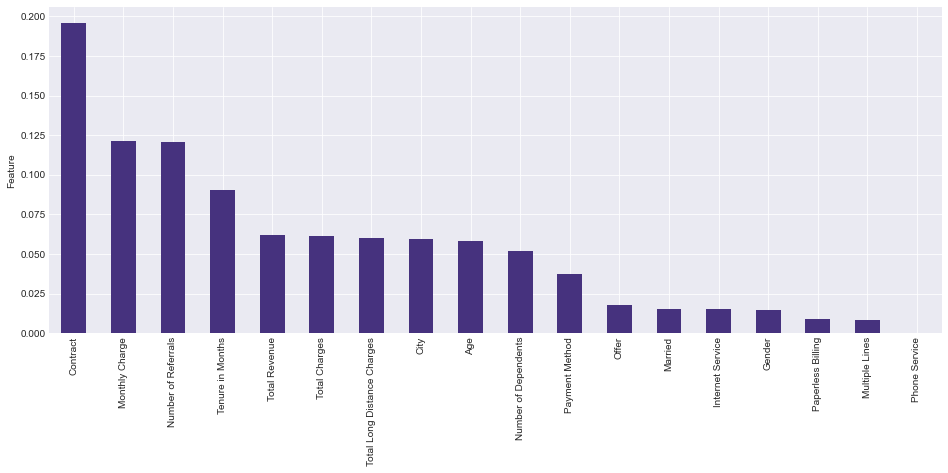

In [238]:
#Feature Importance
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');